#Ejercicio Volúmenes de Ventas con Matplotlib
En este ejercicio trabajaremos con un dataset sobre volúmenes de ventas de empresas en diferentes países. Realizaremos diferentes tipos de gráficas para responder a ciertas preguntas.  
Para ello primero importamos las librerías necesarias y el dataset. De este último eliminamos los registros con valores nulos (si existen) en alguna de las columnas.

In [83]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm

In [84]:
data = pd.read_csv('eu_sample_2.csv')
data = data[data['AMT'] >= 0]
data = data.dropna(subset=['DATE','MU','BU','SCTR','CNTRY','AMT'])

data.head()

,YR,PRD,MONTH,DATE,SCENRO,MU,BU,SCTR,CNTRY,SUBBRAND,AMT
0,2017,2.0,1,2017-01-01,Actual,CE FOBO,FOBO BU,Europe,Albania,L3_1233,20969.017914
1,2017,2.0,1,2017-01-01,Actual,CE FOBO,FOBO BU,Europe,Albania,L3_1259,141.987137
2,2017,2.0,1,2017-01-01,Actual,CE FOBO,FOBO BU,Europe,Albania,L3_24,1058.399611
3,2017,2.0,1,2017-01-01,Actual,CE FOBO,FOBO BU,Europe,Albania,L3_837,30813.110677
4,2017,2.0,1,2017-01-01,Actual,CE FOBO,FOBO BU,Europe,Albania,L3_956,2254.041831


##Pregunta 1
*¿Cuál es la distribución de volumen de ventas entre las Business Units y las Market Units? ¿Cuales son las Market  Units con más volumen? ¿Cual es el puesto de España en su Business Unit?*  
  
Para responder a dicha pregunta realizaremos un pie-chart. Este tipo de gráfica es muy útil para ver diferencias de tamaños/porcentajes. Si en vez de porcentajes quisiesemos representar el número de unidades quizás sería más útil un diagrama de barras.   
  
Para realizar el pie-chat primero agrupamos los datos en función de su MU realizando la suma de todos los valores de los mismos grupos. Finalmente, graficamos los datos. Cabe mencionar que se ha añadido un leyenda para una visualización más limpia y evitar la solapación de porcentajes de los grupos pequeños.

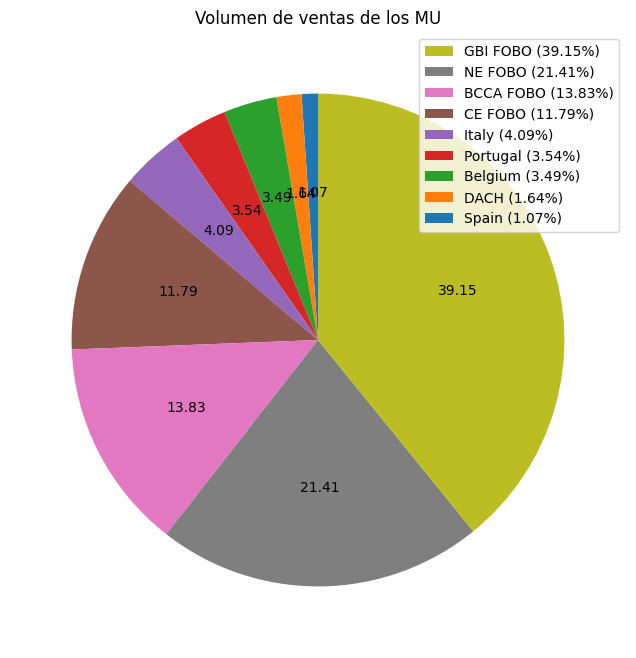

In [85]:
v_MU = data.groupby('MU')['AMT'].sum()
labelsMU = v_MU.sort_values(ascending=True).index

#Piechart
plt.figure(figsize=(8,8))
patches,text,perct = plt.pie(v_MU.sort_values(ascending=True), autopct='%0.2f', startangle=90)
percentages = [percentages.get_text() for percentages in perct]
plt.title('Volumen de ventas de los MU')
plt.legend(patches[::-1], labelsMU[::-1] + ' (' + percentages[::-1] + '%)', loc="best")
plt.show()

Podemos observar que el 85% apróx. del volumen de venta esta controlado por los grupos acabados en FOBO, siendo mayoritariamente (casi 40%) GBI FOBO.

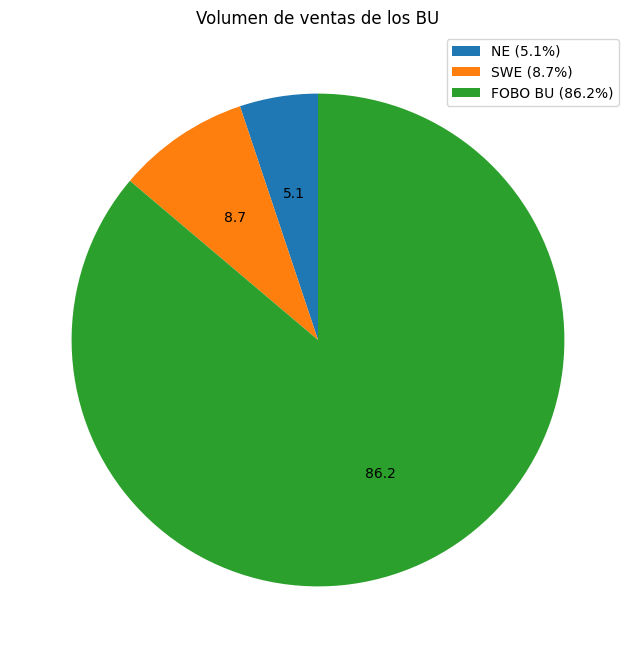

In [86]:
v_BU = data.groupby('BU')['AMT'].sum()
labelsBU = v_BU.sort_values(ascending=True).index

#Piechart
plt.figure(figsize=(8,8))
patches,text,perct = plt.pie(v_BU.sort_values(ascending=True), autopct='%.1f', startangle=90)
percentages = [percentages.get_text() for percentages in perct]
plt.title('Volumen de ventas de los BU')
plt.legend(patches, labelsBU + ' (' + percentages + '%)', loc="best")
plt.show()

En cuanto al volumen de venta de los BU, claramente FOBO BU tiene la mayoría con un 86.2%. Los otros dos grupos tienen un porcentaje parecido entre ellos.  
  
Ahora se realizará el gráfico de barras para poder ver también los volúmenes y no solo el porcentaje que corresponde a este sobre el total. Además, se utilizará un colormap en el diagrama para una gráfica más visual. Este colormap es el cool, implementado ya en matplotlib.
 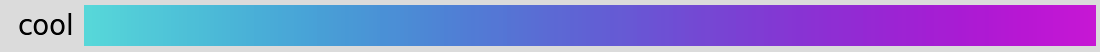
Para realizar el diagrama primero ordenamos los valores de volúmenes de ventas de mayor a menor, los normalizamos entre 0 y 1 (siendo estos mín y máx) para poder asignar un color del colormap a cada uno y finalmente configuramos y graficamos el diagrama.

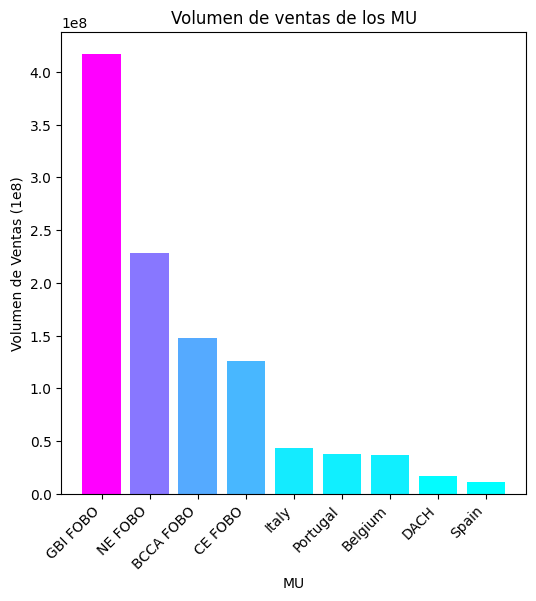

In [87]:
#Diagrama de barras
values = v_MU.sort_values(ascending=False).values
normalize = plt.Normalize(vmin=min(values), vmax=max(values))
colormap = plt.cm.cool
colors = colormap(normalize(values))


plt.figure(figsize=(6,6))
plt.bar(labelsMU[::-1], values, color = colors)
plt.xticks(rotation=45, ha='right')
plt.title('Volumen de ventas de los MU')
plt.xlabel('MU')
plt.ylabel('Volumen de Ventas (1e8)')
plt.show()

Podemos observar que, efectivamente, GBI FOBO supera con creces a todos los demas grupos de MU, esto es explicado también por la diferencia de color. Este esta seguido de los demás FOBOs y finalmente los demás grupos que, como se observa por su color, hay poca diferencia.

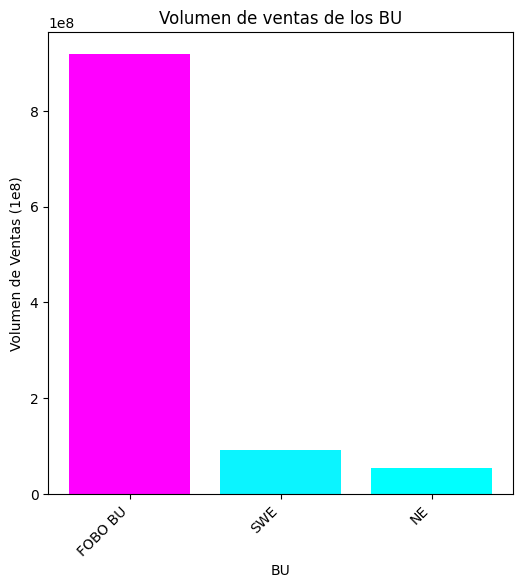

In [88]:
#Diagrama de barras
values = v_BU.sort_values(ascending=False).values
normalize = plt.Normalize(vmin=min(values), vmax=max(values))
colormap = plt.cm.cool
colors = colormap(normalize(values))


plt.figure(figsize=(6,6))
plt.bar(labelsBU[::-1], values, color = colors)
plt.xticks(rotation=45, ha='right')
plt.title('Volumen de ventas de los BU')
plt.xlabel('BU')
plt.ylabel('Volumen de Ventas (1e8)')
plt.show()

Lo mismo sucede con el diagrama de barras de volúmen de ventas de BU. FOBO BU, con un volúmen de apróx. 9*(10^8) ventas, supera con creces a los demás grupos de BU (SWE y NE).  
  
  Ahora veamos en que posición se encuentra España dentro de su Business Unit. Para ello, primero veamos a que Business Unit pertenece.

In [89]:
spaindata = data[data['MU'] == 'Spain']
spaindata.head(1)

,YR,PRD,MONTH,DATE,SCENRO,MU,BU,SCTR,CNTRY,SUBBRAND,AMT
364,2017,2.0,1,2017-01-01,Actual,Spain,SWE,Europe,Spain,L3_1233,101990.507421


Tras observar que pertenece a la BU de SWE, filtramos los datos, cogiendo aquellos que solo pertenecen a dicha BU, y los agrupamos por MU, haciendo la suma de los valores de AMT pertenecientes a cada grupo. Los ordenamos de mayor a menor.

In [90]:
SWEdata = data[data['BU'] == 'SWE']
vMU_SWE = pd.DataFrame(SWEdata.groupby('MU')['AMT'].sum().sort_values(ascending=False))
vMU_SWE.head()

,AMT
MU,
Italy,4.357727e+07
Portugal,3.770476e+07
Spain,1.137226e+07


Se puede ver que España esta en tercera y **última** posición dentro de su Business Unit.

##Pregunta 2
*¿Cuál es la tendencia y estacionalidad de la serie de España?*  
  
  Para poder responder esta pregunta primero se debe seleccionar solo aquellos datos que pertenecen a España. Como esto ya se hizo anteriormente ahora lo que se ha de hacer es agrupar dichos datos por fecha y hacer la suma de los valores pertenecientes a un mismo grupo.

In [91]:
spaindata_t = pd.DataFrame(spaindata.groupby('DATE')['AMT'].sum())
spaindata_t.head()

,AMT
DATE,
2017-01-01,322104.231682
2017-02-01,343562.968025
2017-03-01,428328.541841
2017-04-01,426471.705424
2017-05-01,442546.455517


Tras esto se realiza la descomposición de los datos de españa ya procesados. Para ello se utiliza la librería *statsmodels.api*, en concreto la función *sm*. Primero, se pasa el index a tipo de dato de fecha. Posteriormente, se realiza la descomposición con modelo aditivo y un periodo de 12 (meses). Finalmente, se grafica la serie original, la tendencia de dicha serie y su estacionalidad. También se grafican los residuos.

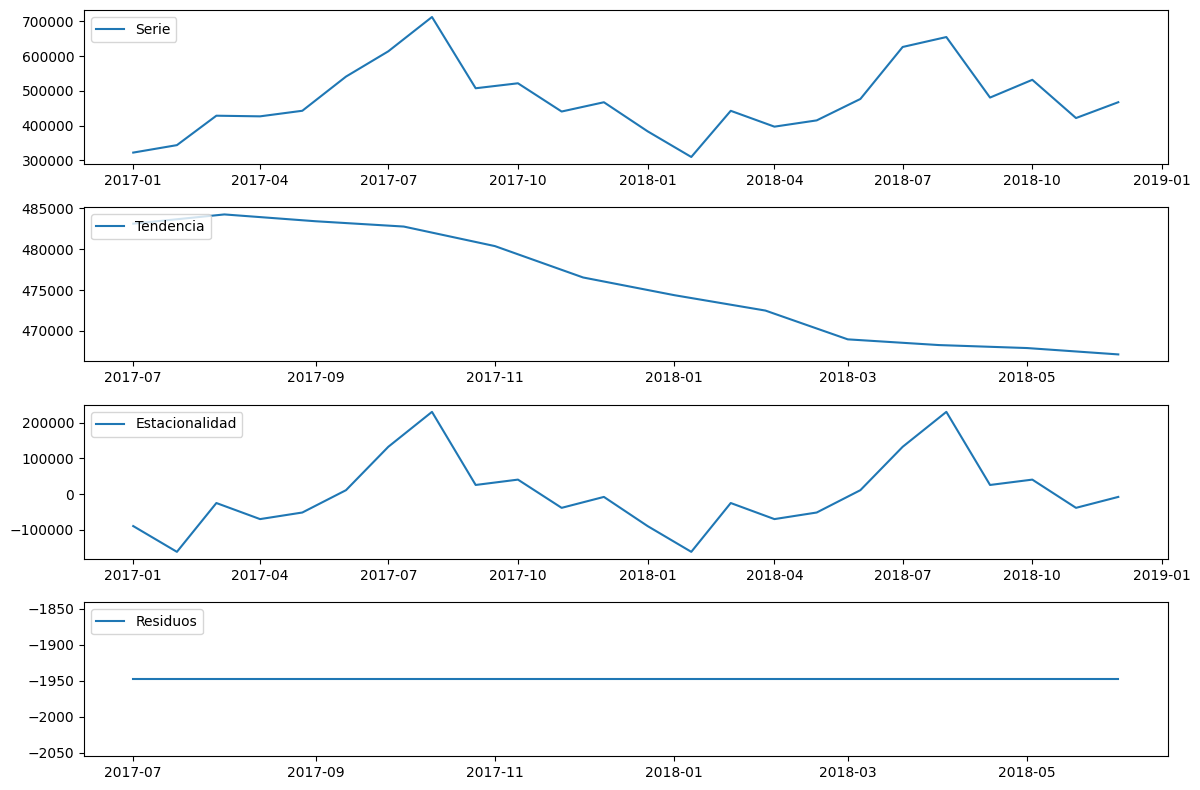

In [92]:
# Descomposición serie temporal
spaindata_t.index = pd.to_datetime(spaindata_t.index)
ST = sm.tsa.seasonal_decompose(spaindata_t['AMT'], model='additive', period=12)

#Graficamos la serie, tendencia, estacionalidad y residuos
plt.figure(figsize=(12, 8))
plt.subplot(4, 1, 1)
plt.plot(ST.observed, label='Serie')
plt.legend(loc='upper left')
plt.subplot(4, 1, 2)
plt.plot(ST.trend, label='Tendencia')
plt.legend(loc='upper left')
plt.subplot(4, 1, 3)
plt.plot(ST.seasonal, label='Estacionalidad')
plt.legend(loc='upper left')
plt.subplot(4, 1, 4)
plt.plot(ST.resid, label='Residuos')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

Se observa que la tendecia de España es negativa y una estacionalidad que se repite cada año.

##Pregunta 3
*Si tuvieses que mejorar las ventas de Europa ¿En que país te centrarías para aplicar medidas?*   
  En el caso de tener que mejorar las ventas en Europa, se me ocurren diferentes acercamientos para resolver dicho problema.
+ El primero sería ver que paises tienen un pequeño volumen de ventas pero tienen una tendencia positiva. Si ha estos paises se les mete *más dinero* seremos capaces de potenciar esa tendencia positiva y seguir creciendo, aumentando las ventas en Europa. Esto se podría generalizar a varios paises con las mismas caraerísticas.
+ El segundo sería ver que paises tienen una tendencia muy negativa y estudiar el por qué de dicho cambio en los últimos años. Si un país era capaz de vender tanto antes, ¿por qué no iba serlo ahora? Estudiando el por qué de dicho suceso seríamos capaces de, implementando medidas en estos países (que generalmente envuelven dinero), recuperaríamos los niveles de ventas anteriores e incluso los mejoraríamos.  
  
Para ello primero cogemos los paises que pertenecen a Europa y de estos solo aquellos que tienen un mínimo de 24 observaciones (24 fechas diferentes) para poder hacer la descomposición temporar con un periodo de 12 meses.

In [93]:
datanew = data[data['SCTR'] == 'Europe']

#Umbral mínimo de observaciones (2*frecuencia que son 12 meses)
umbral_minimo = 24

# Contar observaciones por país
obs_pais = datanew.groupby('CNTRY')['DATE'].nunique()

# Paises que cumplen umbral mínimo de observaciones
pais_obsumbral = obs_pais[obs_pais >= umbral_minimo].index.tolist()

# Filtrar paises válidos
datafinal = datanew[datanew['CNTRY'].isin(pais_obsumbral)]
datafinal.head()

,YR,PRD,MONTH,DATE,SCENRO,MU,BU,SCTR,CNTRY,SUBBRAND,AMT
0,2017,2.0,1,2017-01-01,Actual,CE FOBO,FOBO BU,Europe,Albania,L3_1233,20969.017914
1,2017,2.0,1,2017-01-01,Actual,CE FOBO,FOBO BU,Europe,Albania,L3_1259,141.987137
2,2017,2.0,1,2017-01-01,Actual,CE FOBO,FOBO BU,Europe,Albania,L3_24,1058.399611
3,2017,2.0,1,2017-01-01,Actual,CE FOBO,FOBO BU,Europe,Albania,L3_837,30813.110677
4,2017,2.0,1,2017-01-01,Actual,CE FOBO,FOBO BU,Europe,Albania,L3_956,2254.041831


Posteriormente, vemos los paises que cumplen las condiciones y hacemos una lista con estos. Además, observamos el número total de paises con los que nos quedamos.

In [95]:
list_paises = datafinal['CNTRY'].unique()
print('Los países con datos suficientes son: \n', list_paises)
print('\n\nTotal de ', len(list_paises), ' paises')

Los países con datos suficientes son: 
 ['Albania' 'Armenia' 'Austria' 'Azerbaijan' 'Belarus' 'Belgium' 'Bulgaria'
 'Croatia' 'Cyprus' 'Denmark' 'Finland' 'Gaza' 'Georgia' 'Germany'
 'Great Britain' 'Iceland' 'Ireland' 'Israel' 'Italy' 'Kazakhstan'
 'Latvia' 'Macedonia' 'Malta' 'Netherlands' 'North Cyprus' 'Norway'
 'Portugal' 'Rhodes' 'Serbia' 'Slovenia' 'Spain' 'Sweden' 'Switzerland'
 'Uzbekistan']


Total de  34  paises


Ahora, procedemos a realizar la descomposición temporal de todos los paises graficando su tendencia. Además, iremos agregando a dos listas (*porcentajes y trend_vars*) tanto la variación de principio a fin de la tendencia (aproximación de una pendiente) y el porcentaje de este (para que no dependa de las unidades puesto que una misma variación dos países puede suponer un porcentaje de variación bastante diferente). Cabe mencionar que en las gráficas de las tendencias, aquellas cuya pendiente es positiva son de color verde y las negativas de color rojo para que sea más visual.

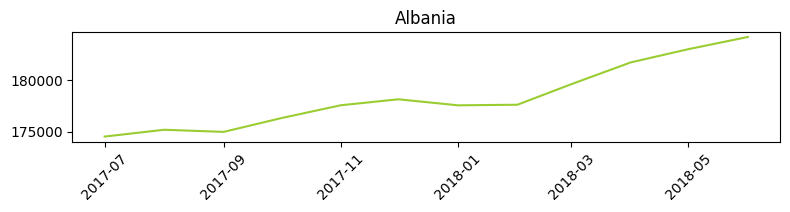

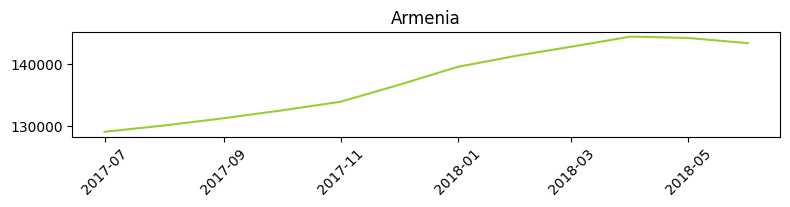

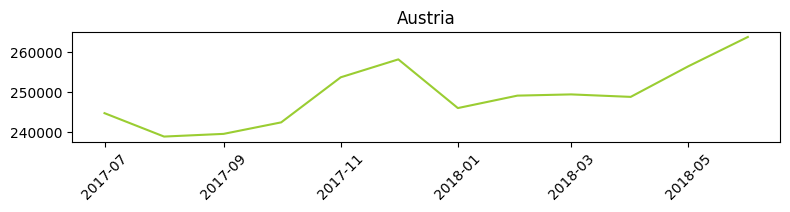

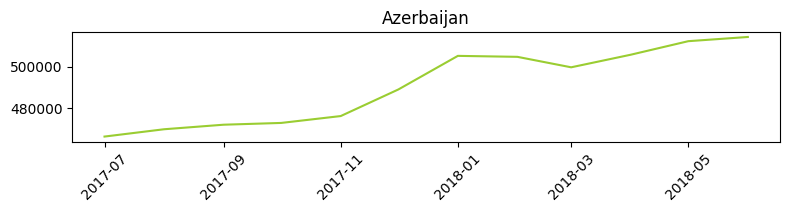

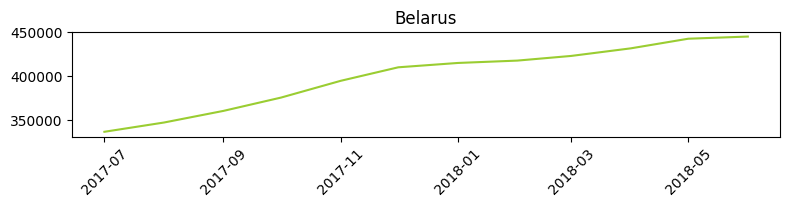

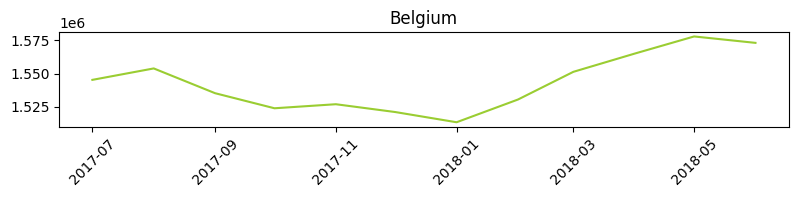

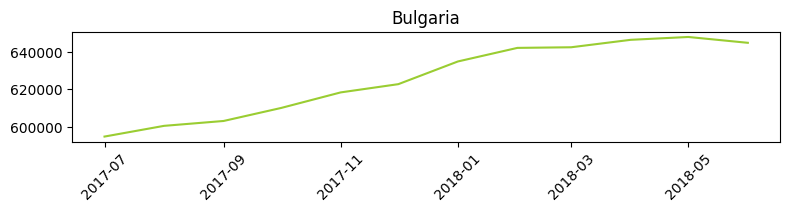

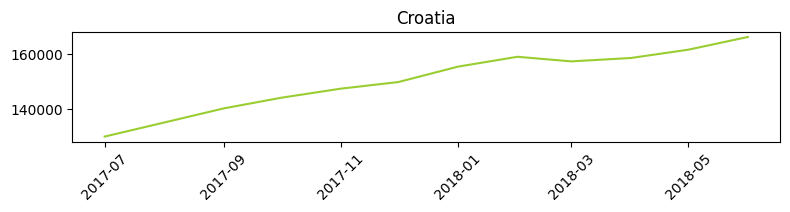

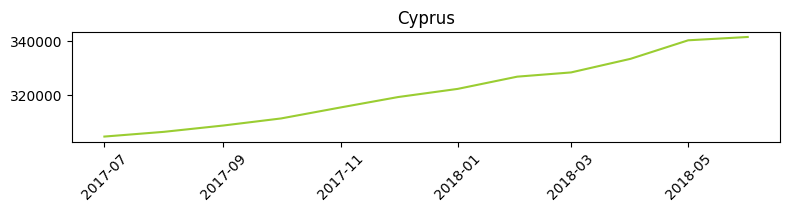

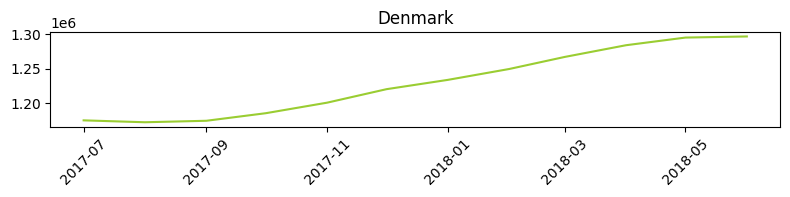

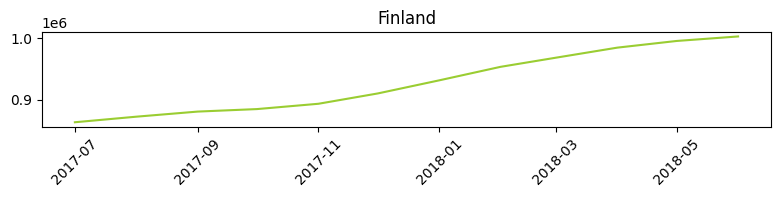

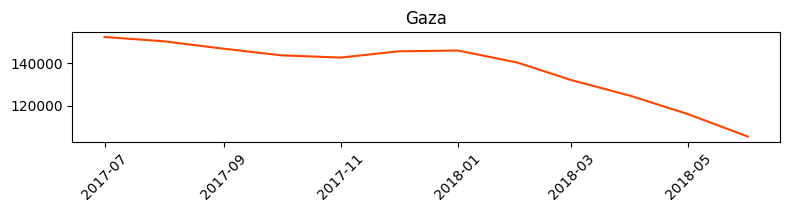

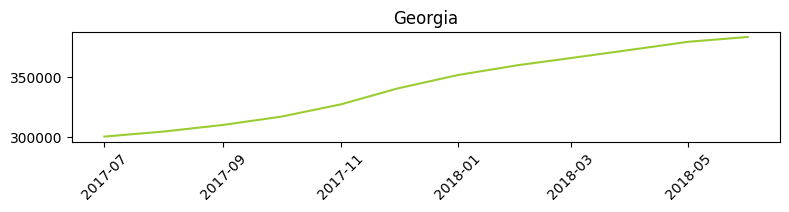

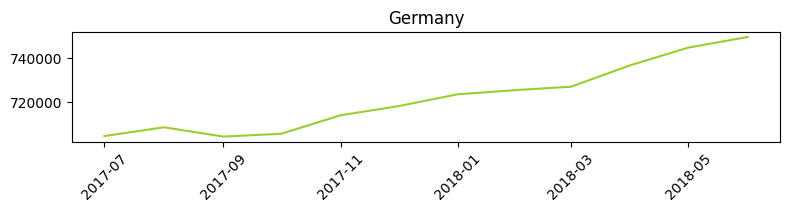

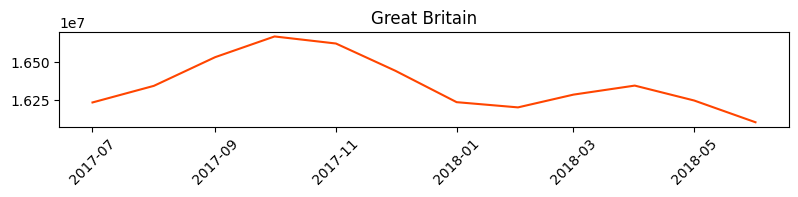

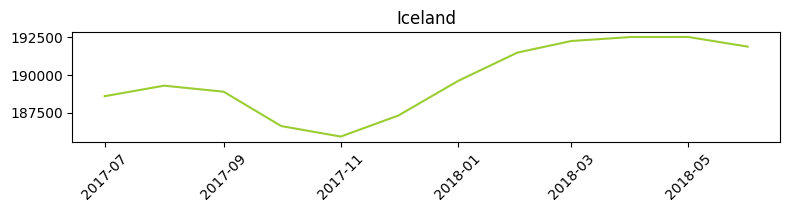

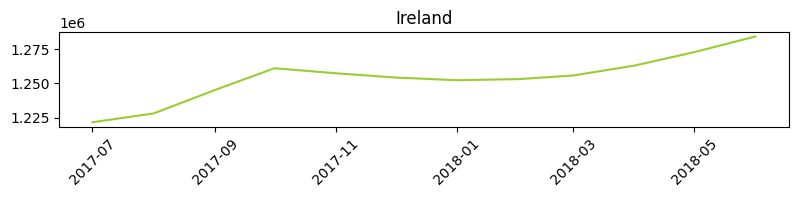

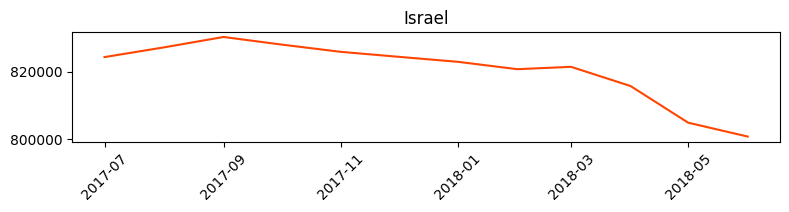

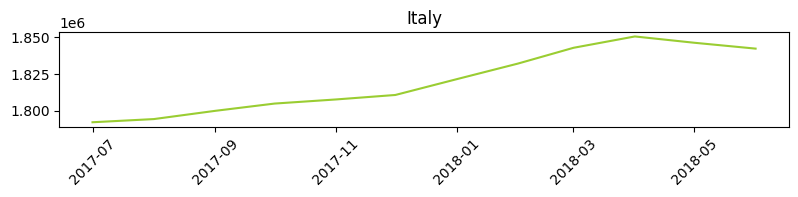

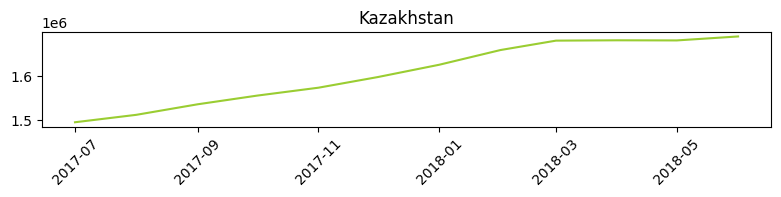

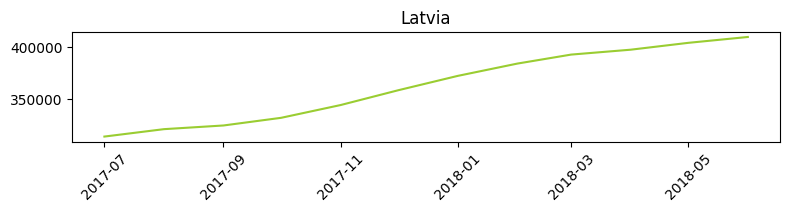

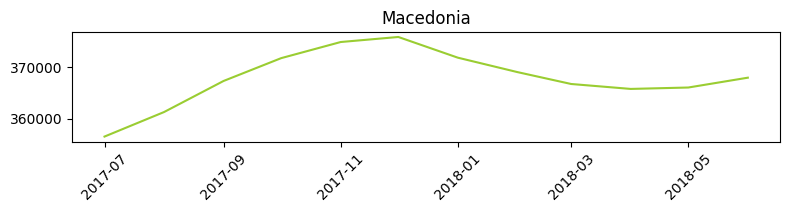

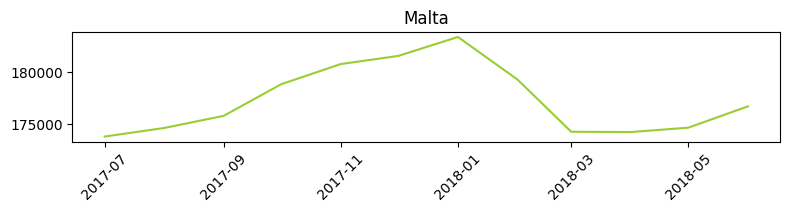

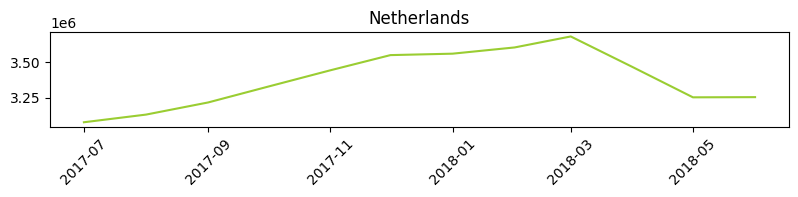

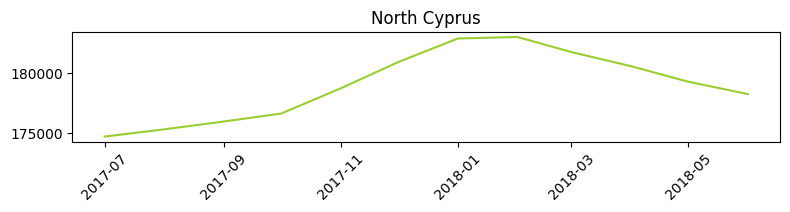

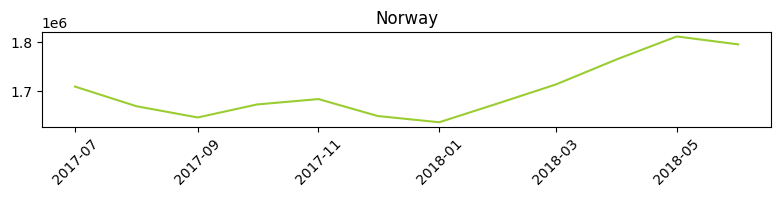

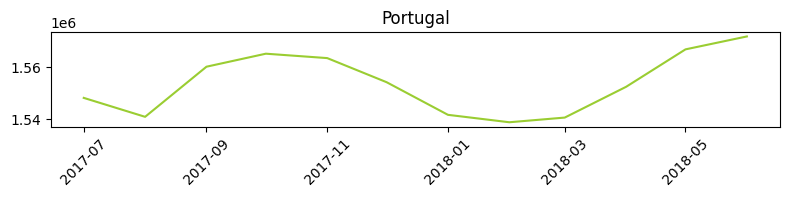

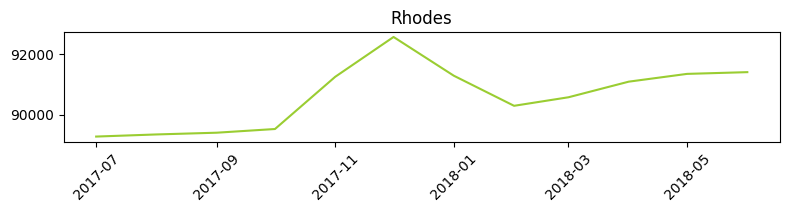

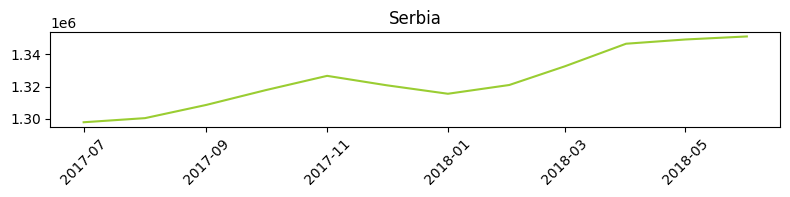

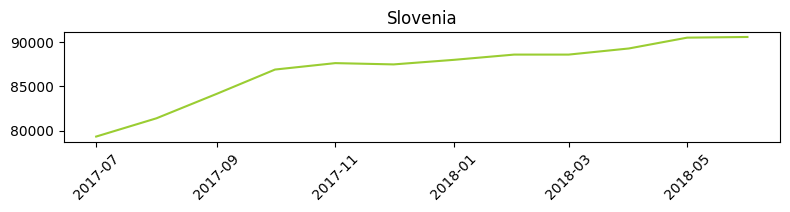

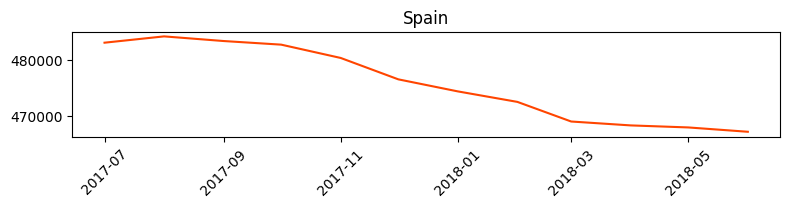

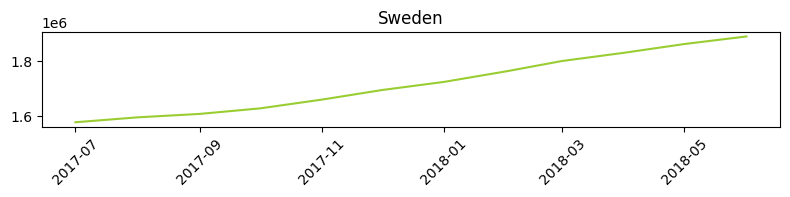

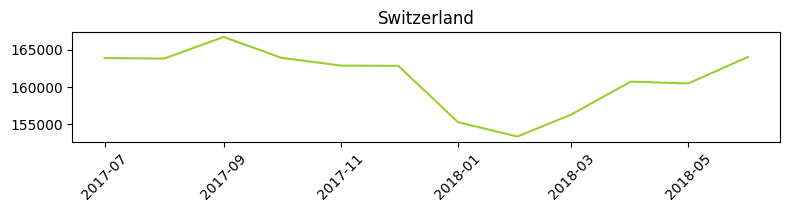

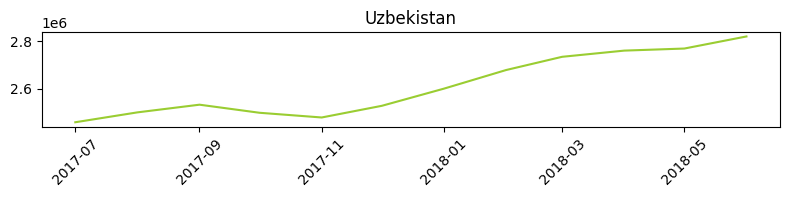

In [96]:
trend_vars = []
porcentajes = []
for i in range(len(list_paises)):
  datapais = datafinal[datafinal['CNTRY'] == list_paises[i]]
  datapais_t = pd.DataFrame(datapais.groupby('DATE')['AMT'].sum())
  datapais_t.index = pd.to_datetime(datapais_t.index)
  ST = sm.tsa.seasonal_decompose(datapais_t['AMT'], model='additive', period=12, two_sided=True)

  #Cálculo de variaciones del principio al final
  trend = ST.trend.dropna()
  trend_var = (trend.iloc[-1] - trend.iloc[0]) / len(trend)
  trend_vars.append((list_paises[i], trend_var))
  cambioperc = ((trend.iloc[-1] - trend.iloc[0]) / trend.iloc[0]) * 100
  porcentajes.append((list_paises[i], cambioperc))

  if trend_var>0:
    colorlinea = 'yellowgreen'
  else:
    colorlinea = 'orangered'

  plt.figure(figsize=(8, 2))
  plt.plot(ST.trend, label=list_paises[i], color=colorlinea)
  plt.xticks(rotation=45)
  plt.tight_layout()
  plt.title(list_paises[i])
  plt.show()



Podemos observar como pocos paises como España, Gran Bretaña o Israel tienen tendencia negativa mientras que la mayoría tienen positiva. Sin embargo, utilicemos las listas calculadas en el paso anterior para un mayor entendimiento y profundidad de estas tendencias. Primero, grafiquemos en un diagrama de barras ambas listas. Ambos diagramas tendrán su propio colormap para mejor visualización. Cabe destacar que el porcentaje de variación tendra como límites 50% y -50% puesto que ninguno supera estos y asi se ven mejor las diferencias.

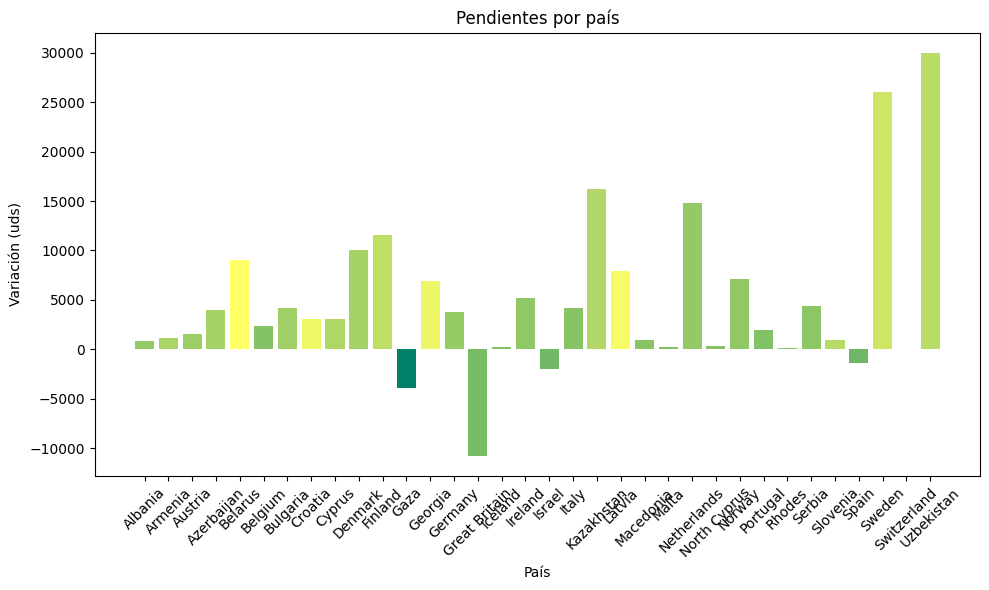

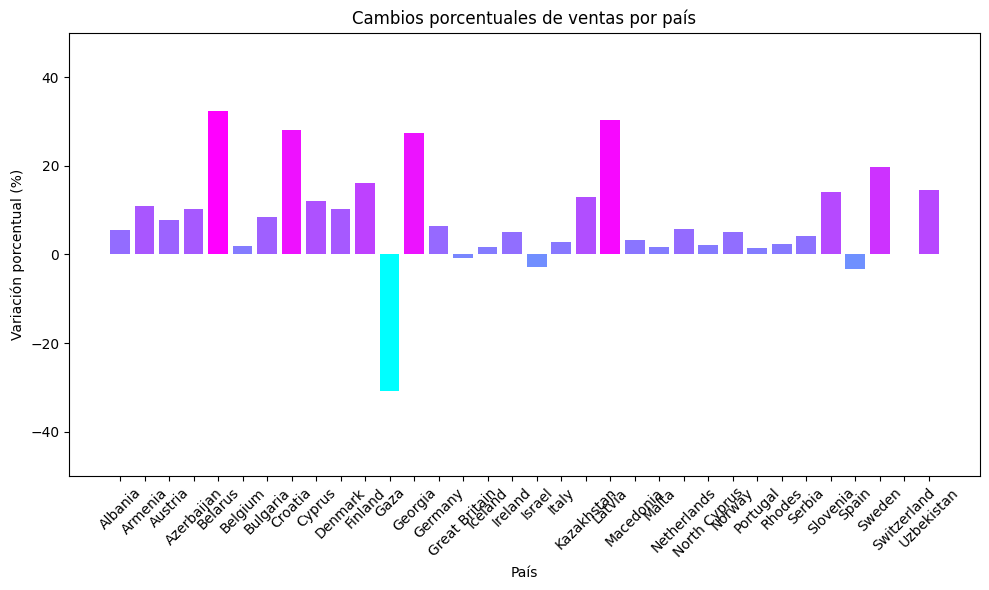

In [97]:
# Crear DataFrames
df_perc = pd.DataFrame(porcentajes, columns=['CTRY', 'PercentageChange'])
df_trend = pd.DataFrame(trend_vars, columns=['CTRY', 'Pendiente'])

#-----------------------------------------------------------

#Colormap Percentages
values = df_perc['PercentageChange']
normalize = plt.Normalize(vmin=min(values), vmax=max(values))
colormap = plt.cm.cool
colors = colormap(normalize(values))

#Colormap Pendientes
values2 = df_trend['Pendiente']
normalize = plt.Normalize(vmin=min(values), vmax=max(values))
colormap = plt.cm.summer
colors2 = colormap(normalize(values))

#-----------------------------------------------------------

# Graficar los cambios porcentuales
plt.figure(figsize=(10, 6))
plt.bar(df_trend['CTRY'], values2, color=colors2, width=0.8)
plt.title('Pendientes por país')
plt.xlabel('País')
plt.ylabel('Variación (uds)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Graficar los cambios porcentuales
plt.figure(figsize=(10, 6))
plt.bar(df_perc['CTRY'], values, color=colors, width=0.8)
plt.title('Cambios porcentuales de ventas por país')
plt.xlabel('País')
plt.ylabel('Variación porcentual (%)')
plt.xticks(rotation=45)
plt.ylim([-50, 50])
plt.tight_layout()
plt.show()

Podemos observar como paises como Uzbekistan o Suecia tienen una variación (pendiente) muy positiva y otros como Gran Bretaña una muy negativa. Sin embargo, si nos fijamos en el diagrama de porcentaje de variación, el porcentaje de variación de estos frente a otros países (cuya pendiente era más pequeña) es menor, como Gaza o Belarus. Es por esto que era interesante graficar ambas cosas y así poder tomar una decisión con más conocimiento.  
  
Ahora, veamos que paises son los que tienen la pendiente más positiva y más negativa. Haremos lo mismo con el porcentaje de variación.

In [99]:
# Encontrar el país con la pendiente más negativa y positiva
most_neg_country, most_neg_var = min(trend_vars, key=lambda x: x[1])
most_pos_country, most_pos_var = max(trend_vars, key=lambda x: x[1])

print(f"El país con la tendencia más negativa es {most_neg_country} con una pendiente de {most_neg_var}")
print(f"El país con la tendencia más positiva es {most_pos_country} con una pendiente de {most_pos_var}")

# Encontrar el país con cambio porcentual más negativo y positivo
most_neg_country, most_neg_perc = min(porcentajes, key=lambda x: x[1])
most_pos_country, most_pos_perc = max(porcentajes, key=lambda x: x[1])

print()
print(f"El país con el cambio porcentual más negativo es {most_neg_country} con un porcentaje de {most_neg_perc:.2f}%")
print(f"El país con el cambio porcentual más positivo es {most_pos_country} con un porcentaje de {most_pos_perc:.2f}%")

El país con la tendencia más negativa es Great Britain con una pendiente de -10750.918693995724
El país con la tendencia más positiva es Uzbekistan con una pendiente de 29963.415792267537

El país con el cambio porcentual más negativo es Gaza con un porcentaje de -30.84%
El país con el cambio porcentual más positivo es Belarus con un porcentaje de 32.28%


Podemos observar que las conclusiones del paso anterior son ciertas. Sin embargo, ahora hemos de tomar la decisión de que medidas adoptar. Para ello, primero hemos de pensar si el fin último es mejorar simplemente las ventas de Europa generalmente o, en este proceso, ayudar también a países en decadencia o cremiento estable y alto.  
  
  Como la pregunta inicial solo mencionaba Europa, sin hacer incapié en los paises, la decisión correcta en este caso sería fijarnos en las pendientes. ¿Por qué? Porque si por ejemplo aumentamos las ventas en Gran Bretaña aunque el porcentaje de variación dentro de este país sea pequeño, dicho cambio afectará más a Europa en volúmen de ventas que si aumentamos un 20% el volúmen de un país con pocas ventas. Sin embargo, grafiquemos esto. Para entender la diferencia.  

  Para ello, aumentemos en un 5% las ventas de Gran Bretaña todos los meses y aumentemos las ventas de Belarus un 50% y veamos como afectan al global de Europa. Primero, creamos un dataframe agrupando por fechas todos los paises de Europa que cumplían las condiciones y realizamos las sumas de sus AMT. Posteriormente realizamos lo mismo en otros dataframes pero haciendo las modificaciones dichas a Gran Bretaña y Belarus.

In [100]:
dataeur_norm = pd.DataFrame(datafinal.groupby('DATE')['AMT'].sum())
dataeur_norm.index = pd.to_datetime(dataeur_norm.index)

# Crear nuevos dataframes modificados
datamodgb = datafinal.copy()
datamodgb.loc[datamodgb['CNTRY'] == 'Great Britain', 'AMT'] *= 1.05
dataeur_gb = pd.DataFrame(datamodgb.groupby('DATE')['AMT'].sum())
dataeur_gb.index = pd.to_datetime(dataeur_gb.index)

datamodb = datafinal.copy()
datamodb.loc[datamodb['CNTRY'] == 'Belarus', 'AMT'] *= 1.5
dataeur_b = pd.DataFrame(datamodb.groupby('DATE')['AMT'].sum())
dataeur_b.index = pd.to_datetime(dataeur_b.index)

Tras crear los dataframes modificados nos disponemos a graficarlos de forma que podamos ver las diferencias en la evolución temporal de Europa y el volúmen total con todos los datos.

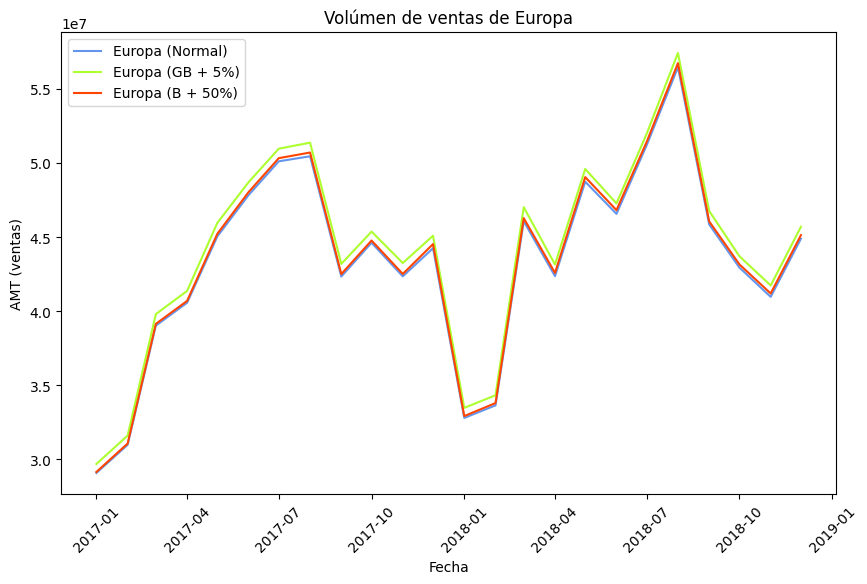

El volumen total de Europa al final de la serie es: 1039304486.64
El volumen total de Europa con Gran Bretaña aumentada un 5% al final de la serie es: 1058654128.72
El volumen total de Europa con Belarus aumentada un 50% al final de la serie es: 1043946492.49
La diferencia de ventas entre el aumento de Gran Bretaña y Belarus es: 14707636.23
La diferencia en aumento porcentual frente al total del dataset cambiando Belarus es: 1.41%


In [106]:
plt.figure(figsize=(10, 6))
plt.plot(dataeur_norm, label='Europa (Normal)', color='cornflowerblue')
plt.plot(dataeur_gb, label='Europa (GB + 5%)', color='greenyellow')
plt.plot(dataeur_b, label='Europa (B + 50%)', color='orangered')

# Añadir etiquetas y título
plt.xlabel('Fecha')
plt.ylabel('AMT (ventas)')
plt.title('Volúmen de ventas de Europa')

# Mostrar la leyenda
plt.legend()

# Rotar etiquetas del eje x para mejor visualización
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()

print(f"El volumen total de Europa al final de la serie es: {dataeur_norm['AMT'].sum():.2f}")
print(f"El volumen total de Europa con Gran Bretaña aumentada un 5% al final de la serie es: {dataeur_gb['AMT'].sum():.2f}")
print(f"El volumen total de Europa con Belarus aumentada un 50% al final de la serie es: {dataeur_b['AMT'].sum():.2f}")
print(f"La diferencia de ventas entre el aumento de Gran Bretaña y Belarus es: {(dataeur_gb['AMT'].sum()-dataeur_b['AMT'].sum()):.2f}")
print(f"La diferencia en aumento porcentual frente al total del dataset cambiando Belarus es: {(dataeur_gb['AMT'].sum()-dataeur_b['AMT'].sum())/dataeur_b['AMT'].sum()*100:.2f}%")

Podemos observar como aumentando solo un 5% las ventas en Gran Bretaña el volumen general de Europa sube más que aumentando un 50% en Belarus. De hecho, aumentando solo un 5% Gran Bretaña aumenta generalmente un 1.41% más que si aumentamos Belarus un 50%. Por eso concluimos que para aumentar el volumen de ventas en Europa sería mejor solución aplicar medidas en paises con un volumen de ventas muy alto, en este caso Gran Bretaña. Además, eliminaríamos esa tendencia negativa de Gran Bretaña ayudando al país también.